<a href="https://colab.research.google.com/github/diego2003-her14/proyecto-telecom/blob/main/desafio2_de_ciencia_de_datos_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📌 Extraccion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
# Importamos las Bibliotecas que necesitaremos para realizar un análisis bello y elegante para el cliente.

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
# Creamos la variable 'url' para almacenar la dirección del archivo que es .json

In [3]:
DF = pd.read_json(url)
# Almacenamos la lectura del achivo en la variable Datos_F

In [4]:
DF.head()
# usamos el parametro .head para ver las 5 primeras filas de los datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
DF.shape
# usamos el parametro .shape para ver cuantas filas "izquierda" y columnas "derecha" hay

(7267, 6)

## 🔧 Transformación

### Usamos los parametros necesarios  para saber los tipos de datos que hay.

In [6]:
DF.info()
# usamos el parametro .info para ver la información de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
DF.dtypes
# para terminar de confirmar que todos son strin o object

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [8]:
DF.columns
# usamos el parametro .columns para ver los nombres de las columnas
# NOTA TÚ QUE SI SON TODOS 'OBJECT'

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

### Utilizamos el parametro .unique para ver los valores unicos.

In [9]:
DF['customerID'].unique()
# usamos el parametro .unique para ver los valores unicos de la columna 'customerID'


array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [10]:
DF['Churn'].unique()
# usamos el parametro .unique para ver los valores unicos de la columna 'Churn'

array(['No', 'Yes', ''], dtype=object)

### Ahora debemos normalizar el archivo porque es tipo .json

In [11]:
df_normalizado_1 = pd.json_normalize(DF['customer'])
# usamos el parametro .json_normalize para normalizar el archivo
df_normalizado_1.shape

(7267, 5)

In [12]:
df_normalizado_2 = pd.json_normalize(DF['phone'])
df_normalizado_2.shape

(7267, 2)

In [13]:
df_normalizado_3 = pd.json_normalize(DF['internet'])
df_normalizado_3.shape

(7267, 7)

In [14]:
df_normalizado_4 = pd.json_normalize(DF['account'])
df_normalizado_4.shape

 #por si se le olvido que hace el parametro .shape
 #es ver cuantas filas y columnas tiene el archivo
 #donde las filas estan a la izquierda y,
 #las columnas a la derecha


(7267, 5)

### eliminaremos algunas columnas del dataframe inicial

In [15]:
DF.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [16]:
DF_Nuevo = DF.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=False)
# usamos el parametro .drop para eliminar las columnas que no necesitamos
# como use el argumento .drop elimine las columnas que estan entre el corchete
# axis=1 lo que hace es eliminar columnas porque si fuera axis=0 eliminaria filas
# y por ultimo inplace=False realiza como una nueva forma del dataframe original
# si fuera inplace=True borraria las columnas del dataframe original

In [17]:
DF_Nuevo['Churn'] = DF_Nuevo['Churn'].str.strip()

In [18]:
DF_Nuevo.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [19]:
# prompt: rellena todos los espacios vacíos de la columna Churn por nan

import numpy as np
DF_Nuevo['Churn'] = DF_Nuevo['Churn'].replace('', np.nan)

In [20]:
DF_Nuevo['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

### Ahora vamos a concatenar los dataframe para hacer uno nuevo y mejorado

In [21]:
dAtOs_F = pd.concat([DF_Nuevo, df_normalizado_1, df_normalizado_2, df_normalizado_3, df_normalizado_4], axis=1)
# usamos el parametro .concat para concatenar los dataframe

In [22]:
dAtOs_F

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Verificamos que tos los datos sean del tipo de dato que les coresponde sea int, float y object

In [23]:
dAtOs_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [24]:
dAtOs_F['Charges.Total'] = dAtOs_F['Charges.Total'].replace(' ', np.nan)

In [25]:
dAtOs_F['Charges.Total'] = dAtOs_F['Charges.Total'].astype(np.float64)

In [26]:
dAtOs_F['Charges.Total'].unique()

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

In [27]:
dAtOs_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Volveremos a usar el metodo .unique para ver si hay espacios en blanco

In [28]:
dAtOs_F.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [29]:
dAtOs_F.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [30]:
dAtOs_F['customerID'].unique()
#no tiene datos en blanco o inconsistentes

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [31]:
dAtOs_F['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [32]:
dAtOs_F['gender'].unique()
# no tiene

array(['Female', 'Male'], dtype=object)

In [33]:
dAtOs_F['SeniorCitizen'].unique()
# Tampoco

array([0, 1])

In [34]:
dAtOs_F['Partner'].unique()
# tampoco

array(['Yes', 'No'], dtype=object)

In [35]:
dAtOs_F['Dependents'].unique()
# tampoco

array(['Yes', 'No'], dtype=object)

In [36]:
dAtOs_F['tenure'].unique()
# tampoco

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [37]:
dAtOs_F['PhoneService'].unique()
# tampoco

array(['Yes', 'No'], dtype=object)

In [38]:
dAtOs_F['MultipleLines'].unique()
# tampoco

array(['No', 'Yes', 'No phone service'], dtype=object)

In [39]:
dAtOs_F['InternetService'].unique()
# tampoco

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [40]:
dAtOs_F['OnlineSecurity'].unique()
# tampoco

array(['No', 'Yes', 'No internet service'], dtype=object)

In [41]:
dAtOs_F['OnlineBackup'].unique()
# tampoco

array(['Yes', 'No', 'No internet service'], dtype=object)

In [42]:
dAtOs_F['DeviceProtection'].unique()
# tampoco

array(['No', 'Yes', 'No internet service'], dtype=object)

In [43]:
dAtOs_F['TechSupport'].unique()
# tampoco

array(['Yes', 'No', 'No internet service'], dtype=object)

In [44]:
dAtOs_F['StreamingTV'].unique()
# tampoco

array(['Yes', 'No', 'No internet service'], dtype=object)

In [45]:
dAtOs_F['StreamingMovies'].unique()
# tampoco

array(['No', 'Yes', 'No internet service'], dtype=object)

In [46]:
dAtOs_F['Contract'].unique()
# tampoco

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [47]:
dAtOs_F['PaperlessBilling'].unique()
# tampoco

array(['Yes', 'No'], dtype=object)

In [48]:
dAtOs_F['PaymentMethod'].unique()
# tampoco

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [49]:
dAtOs_F['Charges.Monthly'].unique()
# tampoco

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [50]:
dAtOs_F['Charges.Total'].unique()
# tampoco

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

### Las Inconsistencias

In [51]:
dAtOs_F.columns.str.lower()

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges.monthly',
       'charges.total'],
      dtype='object')

In [52]:
dAtOs_F.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')



### Columna de cuentas_diarias

In [53]:
# crear una nueva columna llamada cuentas_diarias

dAtOs_F['Cuentas_Diarias'] = dAtOs_F['Charges.Monthly'] / dAtOs_F['tenure']

In [54]:
dAtOs_F.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,7.288889
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,6.655556
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,18.475000
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,7.538462
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,27.966667


In [55]:
dAtOs_F.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [56]:
dAtOs_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [57]:
pd.options.display.float_format = '{:,.2f}'.format

In [58]:
dAtOs_F.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,7.29
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,6.66
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,18.48
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,"1,237.85",7.54
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,27.97


In [59]:
dAtOs_F.shape

(7267, 22)

### Estanderización y Tranformación de Datos

vamos a cambiar los datos que dicen **SI Y NO** por **1 y 0** para un mejor análisis

In [60]:
dAtOs_F

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,7.29
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,6.66
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,18.48
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,"1,237.85",7.54
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,27.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,4.24
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,"1,873.70",3.87
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,25.15
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,"4,627.65",1.01


In [61]:
dAtOs_F['Churn'] = dAtOs_F['Churn'].replace('Yes', 1)
dAtOs_F['Churn'] = dAtOs_F['Churn'].replace('No', 0)

<ipython-input-61-3214199975>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dAtOs_F['Churn'] = dAtOs_F['Churn'].replace('No', 0)


In [62]:
dAtOs_F.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.00,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,7.29
1,0003-MKNFE,0.00,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,6.66
2,0004-TLHLJ,1.00,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,18.48


In [63]:
for col in dAtOs_F.columns:
    if dAtOs_F[col].isin(['Yes', 'No']).all():
        dAtOs_F[col] = dAtOs_F[col].replace({'Yes': 1, 'No': 0})

dAtOs_F.head(3)

<ipython-input-63-152904511>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dAtOs_F[col] = dAtOs_F[col].replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.00,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,7.29
1,0003-MKNFE,0.00,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,6.66
2,0004-TLHLJ,1.00,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,18.48


In [64]:
dAtOs_F['MultipleLines'] = dAtOs_F['MultipleLines'].replace('No', 0)
dAtOs_F['MultipleLines'] = dAtOs_F['MultipleLines'].replace('Yes', 1)


In [65]:
dAtOs_F['DeviceProtection'] = dAtOs_F['DeviceProtection'].replace('No', 0)
dAtOs_F['DeviceProtection'] = dAtOs_F['DeviceProtection'].replace('Yes', 1)

dAtOs_F['TechSupport'] = dAtOs_F['TechSupport'].replace('No', 0)
dAtOs_F['TechSupport'] = dAtOs_F['TechSupport'].replace('Yes', 1)

dAtOs_F['StreamingTV'] = dAtOs_F['StreamingTV'].replace('No', 0)
dAtOs_F['StreamingTV'] = dAtOs_F['StreamingTV'].replace('Yes', 1)

dAtOs_F['StreamingMovies'] = dAtOs_F['StreamingMovies'].replace('No', 0)
dAtOs_F['StreamingMovies'] = dAtOs_F['StreamingMovies'].replace('Yes', 1)

In [66]:
dAtOs_F['Churn'] = dAtOs_F['Churn'].fillna(0)

In [67]:
dAtOs_F['Churn'] = dAtOs_F['Churn'].astype(np.int64)

In [68]:
dAtOs_F.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,7.29
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,6.66
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,18.48


## 📊 Carga y Análisis

### Análisis descriptivo

In [69]:
dAtOs_F.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,"7,267.00","7,267.00","7,267.00","7,267.00","7,267.00","7,267.00","7,267.00","7,267.00","7,256.00","7,267.00"
mean,0.26,0.16,0.48,0.30,32.35,0.90,0.59,64.72,"2,280.63",inf
std,0.44,0.37,0.50,0.46,24.57,0.30,0.49,30.13,"2,268.63",NaN
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.27
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,35.42,400.23,1.28
50%,0.00,0.00,0.00,0.00,29.00,1.00,1.00,70.30,"1,391.00",2.15
75%,1.00,0.00,1.00,1.00,55.00,1.00,1.00,89.88,"3,785.30",6.68
max,1.00,1.00,1.00,1.00,72.00,1.00,1.00,118.75,"8,684.80",inf


### Distribución de evasión

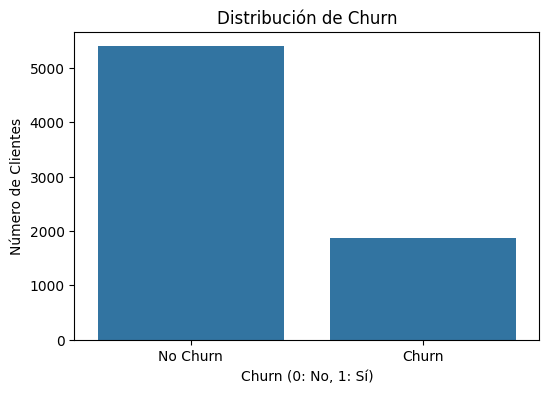

In [70]:
# Obtener el conteo de cada valor en la columna 'Churn'
churn_counts = dAtOs_F['Churn'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribución de Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Churn', 'Churn']) # Etiquetas más descriptivas para el eje x
plt.show()

### Recuento por evasión de variables categóricas

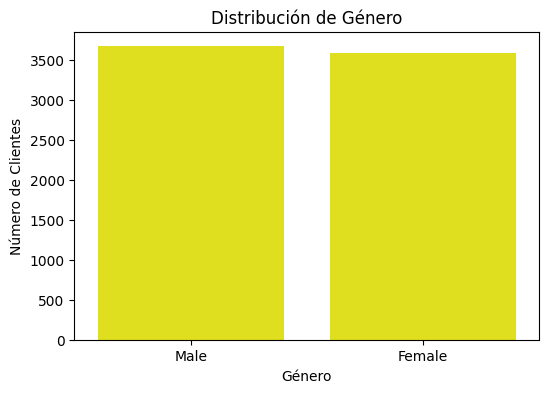

In [71]:
# Obtener el conteo de cada valor en la columna 'gender'
gender_counts = dAtOs_F['gender'].value_counts()

# Crear el gráfico de barras utilizando seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, color='yellow')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

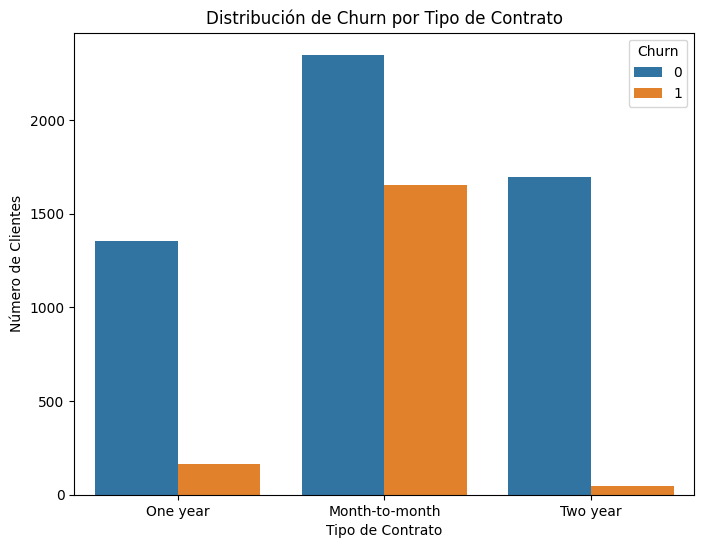

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dAtOs_F, x='Contract', hue='Churn')
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

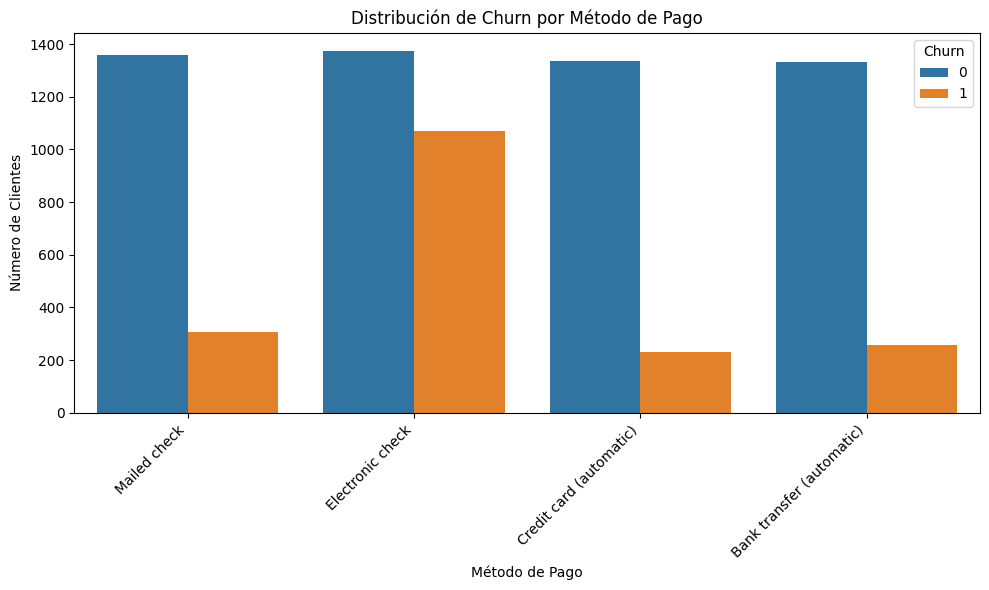

In [73]:

plt.figure(figsize=(10, 6))
sns.countplot(data=dAtOs_F, x='PaymentMethod', hue='Churn')
plt.title('Distribución de Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conteo de evasión por variables numericas

In [74]:
fig = px.box(dAtOs_F, y="Charges.Total", color="Churn",
             title="Distribución de Cargos Totales por Churn (0: No, 1: Sí)",
             labels={"Charges.Total": "Cargos Totales", "Churn": "Churn"})
fig.update_layout(yaxis_title="Cargos Totales")
fig.show()

In [75]:
fig = px.histogram(dAtOs_F, x="Contract", color="Churn", barmode="group",
                   title="Número de Clientes que Cancelaron y No Cancelaron por Tipo de Contrato",
                   labels={"Contract": "Tipo de Contrato", "Churn": "Canceló"})
fig.update_layout(xaxis_title="Tipo de Contrato", yaxis_title="Número de Clientes")
fig.update_xaxes(categoryorder="total descending")
fig.show()


### Correlación entre varibles

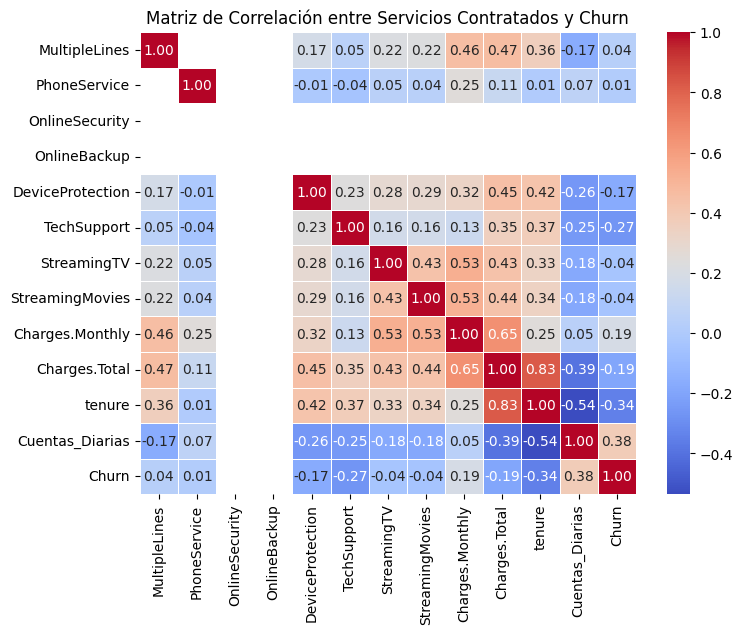

<ipython-input-85-591664404>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




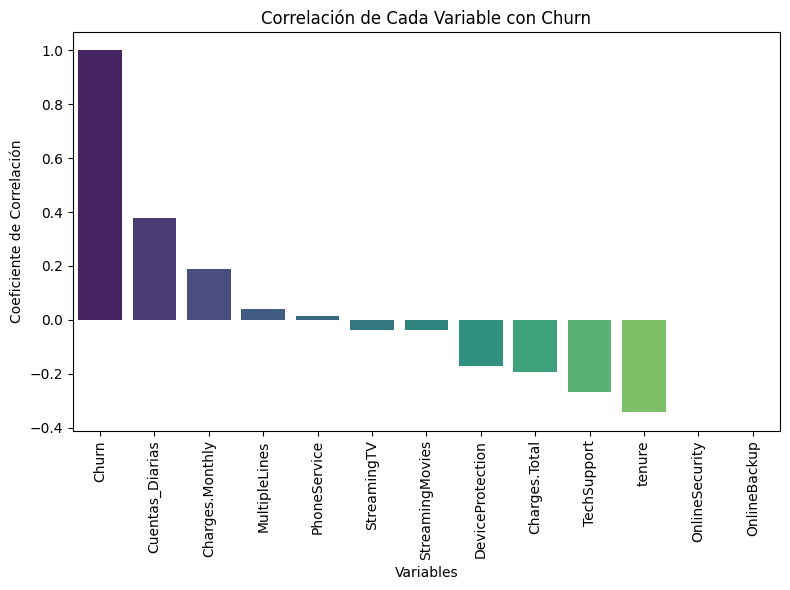

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
# Calcular la matriz de correlación
# Seleccionar las columnas numéricas relevantes para la correlación
numerical_cols = ['MultipleLines', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Charges.Monthly', 'Charges.Total', 'tenure', 'Cuentas_Diarias', 'Churn']

# Asegurarse de que las columnas seleccionadas existen y son numéricas
correlation_df = dAtOs_F[numerical_cols].copy()

# Convertir las columnas relevantes a tipo numérico, manejando errores
for col in correlation_df.columns:
    # Intenta convertir a float, si hay errores, conviértelos a NaN
    correlation_df[col] = pd.to_numeric(correlation_df[col], errors='coerce')

# Eliminar filas con NaN si es necesario para el cálculo de correlación,
# o elegir un método de correlación que maneje NaN (como 'pearson' por defecto que los excluye).
# correlation_df = correlation_df.dropna() # Descomentar si prefieres eliminar NaNs explícitamente

# Calcular la matriz de correlación
corr_matrix = correlation_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Servicios Contratados y Churn')
plt.show()

# Para visualizar específicamente la correlación de Churn con los servicios,
# puedes extraer la fila o columna de 'Churn' de la matriz de correlación.
churn_correlation = corr_matrix['Churn'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_correlation.index, y=churn_correlation.values, palette='viridis')
plt.title('Correlación de Cada Variable con Churn')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

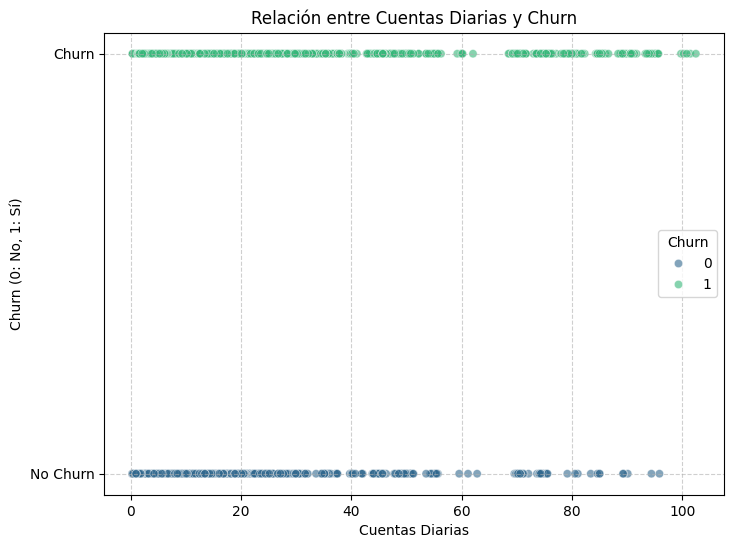

In [86]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dAtOs_F, x='Cuentas_Diarias', y='Churn', hue='Churn', palette='viridis', alpha=0.6)
plt.title('Relación entre Cuentas Diarias y Churn')
plt.xlabel('Cuentas Diarias')
plt.ylabel('Churn (0: No, 1: Sí)')
plt.yticks([0, 1], ['No Churn', 'Churn']) # Etiquetas descriptivas para el eje y
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 📄 Informe final

### 🔹 Introducción
 El presente informe documenta el análisis exploratorio de datos realizado sobre un conjunto de datos de clientes de telecomunicaciones. El objetivo principal es identificar patrones y factores que contribuyen a la evasión de clientes, también conocida como Churn. El Churn representa un desafío significativo para las empresas de telecomunicaciones, ya que la retención de clientes suele ser más rentable que la adquisición de nuevos. Comprender por qué los clientes se van es fundamental para desarrollar estrategias efectivas de retención y mejorar la rentabilidad.


### 🔹 Limpieza y Tratamiento de Datos
 El proceso de análisis comenzó con la importación de los datos desde un archivo JSON alojado en un repositorio de GitHub. Dado que la estructura del JSON contenía datos anidados, fue necesario normalizar las columnas 'customer', 'phone', 'internet' y 'account' utilizando `pd.json_normalize()`. Posteriormente, se eliminaron estas columnas originales del DataFrame principal, creando un nuevo DataFrame (`DF_Nuevo`).

 Se identificó un espacio en blanco en la columna 'Churn', que fue tratado como un valor nulo (`np.nan`) y posteriormente imputado con el valor 0 (No Churn) para permitir el análisis.

 Los DataFrames normalizados fueron concatenados con el DataFrame principal (`DF_Nuevo`) para formar un único DataFrame consolidado llamado `dAtOs_F`.

 Se verificaron los tipos de datos, identificando que la columna 'Charges.Total' contenía espacios en blanco que impedían su conversión a un tipo numérico. Estos espacios fueron reemplazados por `np.nan` y la columna fue convertida correctamente a tipo `float64`.

 Se creó una nueva columna, 'Cuentas_Diarias', calculada como el cociente entre 'Charges.Monthly' y 'tenure'. Esta métrica podría ser útil para entender el costo diario para el cliente en función de su antigüedad.

 Finalmente, para facilitar el análisis y la posible aplicación de modelos, se estandarizaron las columnas que contenían los valores 'Yes' y 'No', reemplazándolos por 1 y 0 respectivamente. Esto se aplicó a columnas como 'Churn', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', y 'StreamingMovies'.



### 🔹 Análisis Exploratorio de Datos
 Se realizaron varios análisis exploratorios para entender las características de los datos y su relación con el Churn:

  *  Distribución de Churn:** Se visualizó la proporción de clientes que han abandonado el servicio (Churn) en comparación con los que se han quedado. Un gráfico de barras mostró que la mayoría de los clientes no han abandonado.
  *  Distribución por Variables Categóricas:** Se analizaron distribuciones de variables como 'gender', 'Contract', y 'PaymentMethod' en relación con el Churn.
  *   La distribución de género mostró una división equitativa entre hombres y mujeres en la base de clientes.
  *   El análisis por tipo de contrato (`Contract`) reveló que los clientes con contratos a largo plazo (One year, Two year) tienen tasas de Churn significativamente menores en comparación con los clientes con contratos mensuales (Month-to-month). Esto sugiere que los contratos a largo plazo son un factor importante en la retención.
  *   La distribución por método de pago (`PaymentMethod`) indicó que ciertos métodos, como el pago electrónico (Electronic check), están asociados con tasas de Churn más altas.
  *  Distribución por Variables Numéricas:** Se exploró la relación entre variables numéricas y el Churn.
  *   Un diagrama de caja mostró que los clientes que hacen Churn (`Churn` = 1) tienden a tener cargos totales (`Charges.Total`) más bajos en comparación con los clientes que no hacen Churn (`Churn` = 0). Esto podría indicar que los clientes que se van no han estado utilizando el servicio por mucho tiempo o tienen servicios de menor costo acumulado.
  *   La relación entre 'Cuentas_Diarias' y 'Churn' se exploró con un gráfico de dispersión. Aunque la relación no es lineal, los puntos de Churn tienden a concentrarse en ciertos rangos, lo que podría ser investigado con mayor profundidad.
  *  Correlación entre Variables:** Se calculó y visualizó una matriz de correlación para entender las relaciones entre las variables numéricas y el Churn.
   *   Se observó una correlación negativa con la antigüedad (`tenure`) y los cargos totales (`Charges.Total`), lo cual es esperable: a mayor antigüedad y mayores cargos totales acumulados, menor es la probabilidad de Churn.
   *   Variables como 'Contract', 'OnlineSecurity', y 'TechSupport' mostraron correlaciones negativas con el Churn, lo que sugiere que tener estos servicios o tipos de contrato reduce la probabilidad de abandono.
   *   Variables como 'PaperlessBilling', 'Electronic check' (implícito en PaymentMethod), y la falta de ciertos servicios (como 'OnlineSecurity' cuando es 'No internet service' o simplemente 'No') mostraron correlaciones positivas con el Churn.



### 🔹 Conclusiones e Insights
 Los hallazgos clave del análisis exploratorio de datos son:

 *  Contratos a Largo Plazo:** Los clientes con contratos anuales o bianuales tienen una probabilidad significativamente menor de hacer Churn en comparación con los que tienen contratos mensuales.
 *  Métodos de Pago:** El método de pago 'Electronic check' parece estar asociado con una mayor tasa de Churn.
 *  Servicios Adicionales:** La suscripción a servicios como seguridad en línea (`OnlineSecurity`) y soporte técnico (`TechSupport`) está correlacionada negativamente con el Churn, lo que sugiere que estos servicios aumentan la lealtad del cliente.
 * Antigüedad y Gasto Total:** Los clientes con mayor antigüedad y mayor gasto total acumulado son menos propensos a abandonar. Los clientes que hacen Churn a menudo tienen una antigüedad corta y cargos totales bajos.
 * Facturación Electrónica (`PaperlessBilling`):** Parece haber una correlación positiva entre la facturación electrónica y el Churn, lo cual podría ser una correlación indirecta o un área a investigar más a fondo.

#### Estos insights sugieren que el tipo de contrato, los métodos de pago utilizados, la antigüedad del cliente, el gasto total acumulado y la suscripción a servicios de valor añadido son predictores importantes del Churn.



### 🔹 Recomendaciones
 Basado en los hallazgos del análisis, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

 1.  Incentivar Contratos a Largo Plazo:** Desarrollar y promocionar ofertas atractivas para que los clientes migren de contratos mensuales a contratos anuales o bianuales. Esto podría incluir descuentos en tarifas, beneficios adicionales o promociones especiales.
 2.  Monitorear Métodos de Pago de Alto Riesgo:** Identificar a los clientes que utilizan métodos de pago asociados con altas tasas de Churn (como 'Electronic check') y considerar estrategias de retención dirigidas a este segmento, como encuestas de satisfacción o ofertas personalizadas.
 3.  Promover Servicios de Valor Añadido:** Resaltar los beneficios de servicios como seguridad en línea y soporte técnico. Considerar ofrecer pruebas gratuitas o descuentos iniciales para fomentar la adopción de estos servicios, ya que están asociados con una menor probabilidad de Churn.
 4.  Programas de Lealtad Temprana:** Enfocarse en la retención de clientes nuevos durante los primeros meses, ya que los clientes que hacen Churn a menudo tienen una antigüedad corta. Implementar programas de bienvenida robustos, soporte proactivo y encuestas de satisfacción temprana.
 5.  Investigar la Relación con la Facturación Electrónica:** Analizar más a fondo por qué la facturación electrónica se correlaciona positivamente con el Churn. Podría ser que esté asociada con un segmento de clientes más joven o con menos lealtad.
 6.  Desarrollar un Modelo Predictivo de Churn:** Utilizar estos insights para construir un modelo de machine learning que prediga la probabilidad de Churn para cada cliente. Esto permitiría a la empresa identificar a los clientes en riesgo y ejecutar campañas de retención proactivas y personalizadas antes de que decidan irse.

#### La implementación de estas recomendaciones, respaldada por un monitoreo continuo y análisis de datos, puede ayudar a la empresa a mejorar significativamente sus tasas de retención de clientes y, en consecuencia, su rentabilidad.

